In this work, a linear regression algorithm is implemented and the dataset used is from [Kaggle](https://www.kaggle.com/andonians/random-linear-regression). We will investigate the relationship between unit **x** and **y**. It is univariate regression as it only consider one feature.

We will fit the linear regression parameters to our dataset using gradient descent.The objective of linear regression is to minimize the cost function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv("fabricated_points.csv")
data

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


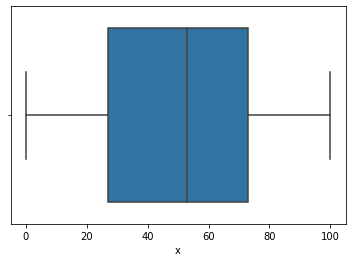

In [5]:
# Inspect the data values in the target column whether have any outlier
sns.boxplot(x=data['x'])

In [0]:
X = np.array(data['x']).reshape(-1,1)
Y = np.array(data['y']).reshape(-1,1)

In [16]:
X[:5]

array([[77],
       [21],
       [22],
       [20],
       [36]])

There are few optimization algorithms for finding a local minimum in regression. Gradient descent is the iterative algorithm used to optimize the learning. The purpose is to minimize the cost function value.

Another way to determine the minimum cost value is Normal Equation. It is an analytical way to solve for weights or called parameter with a Least Square Cost Function. We can directly find out the value of θ without using Gradient Descent. However, it only effective for small features data.

After derivation, the final equation obtained for Normal Equation with weights that give minimum cost value as follows:

![alt text](https://media.geeksforgeeks.org/wp-content/uploads/Untitled-drawing-1-10.png)

In [12]:
ne_theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
ne_theta

array([[1.0074256]])

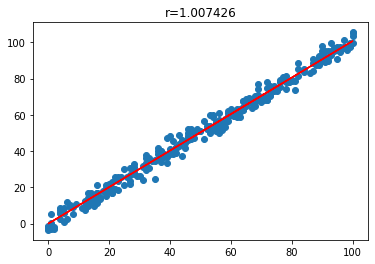

In [13]:
# plot the graph
plt.scatter(X[:,0],Y[:,0])
plt.plot(X, X.dot(ne_theta), c='red')
plt.title('r=%f'%ne_theta[0,0])
plt.show()

Now, let's try gradient descent to optimize the cost function with some learning rate. Assuming no bias and regularization take into consideration. Recall that the parameters of your model are the theta values. These are
the values you will adjust to minimize cost values of hypothesis.

**Hypothesis**: h(x) = theta_0 + theta_1 * x <br>
**Paramters**: theta_0, theta_1 <br>
**Cost function**: J(theta_0, theta_1) = 1/2m (h(x)-y)^2 for all data points <br> 
**Goal**: To minimize J(theta_0, theta_1)

In [0]:
def derivative_J_theta(x, y, theta_0, theta_1):

  delta_J_theta0 = 0
  delta_J_theta1 = 0

  for i in range(len(x)):
    delta_J_theta0 +=  (((theta_1 * x[i]) + theta_0) - y[i])
    delta_J_theta1 +=  (1/x.shape[0]) * (((theta_1 * x[i]) + theta_0) - y[i]) * x[i]
  
  temp0 = theta_0 - (learning_rate * ((1/x.shape[0]) * delta_J_theta0) )
  temp1 = theta_1 - (learning_rate * ((1/x.shape[0]) * delta_J_theta1) )
  
  return temp0, temp1

In [0]:
def gradient_descent(x, y, learning_rate, starting_theta_0, starting_theta_1, iteration_num):
  store_theta_0 = np.empty([iteration_num])
  store_theta_1 = np.empty([iteration_num])
  # store_j_theta = []

  theta_0 = starting_theta_0
  theta_1 = starting_theta_1

  for i in range(iteration_num):
    theta_0, theta_1 = derivative_J_theta(x, y, theta_0, theta_1)
    store_theta_0[i] = theta_0
    store_theta_1[i] = theta_1
    store_j_theta = ((1/2*X.shape[0]) * ( ((theta_1 * X) + theta_0) - Y)**2)
    # store_j_theta.append((1/2*X.shape[0]) * ( ((theta_1 * X) + theta_0) - Y)**2)


  return theta_0, theta_1, store_theta_0, store_theta_1, store_j_theta

At first, we try on less iteration number to observe the learning performance. Try on 10 iteration or epoch.

In [19]:
x = X
y= Y
learning_rate =  0.01
iteration_num = 10
starting_theta_0 = 0
starting_theta_1 = 0


theta_0, theta_1, store_theta_0, store_theta_1, store_j_theta = gradient_descent(x, y, learning_rate, starting_theta_0, starting_theta_1, iteration_num)

print("m : %f" %theta_0[0])
print("b : %f" %theta_1[0])

m : 3.021921
b : 0.684601


Now we plot the graph to check how close is the optimized theta_0 and theta_1 againts the Normal Equation.

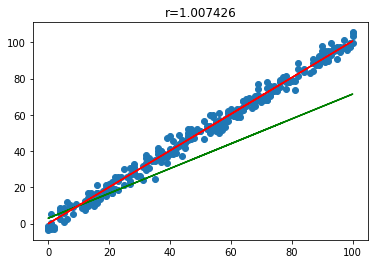

In [20]:
plt.scatter(X[:,0],Y[:,0])
plt.plot(X,(theta_1 * X) + theta_0, c='green')
plt.plot(X, X.dot(ne_theta), c='red')
plt.title('r=%f'%ne_theta[0,0])
plt.show()

Almost there! Let's try on more iteration number that is 100.

In [24]:
x = X
y= Y
learning_rate =  0.01
iteration_num = 100
starting_theta_0 = 0
starting_theta_1 = 0


theta_0, theta_1, store_theta_0, store_theta_1, store_j_theta = gradient_descent(x, y, learning_rate, starting_theta_0, starting_theta_1, iteration_num)

print("m : %f" %theta_0[0])
print("b : %f" %theta_1[0])

m : 3.357218
b : 0.956048


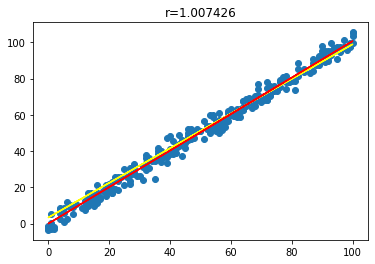

In [26]:
plt.scatter(X[:,0],Y[:,0])
plt.plot(X,(theta_1 * X) + theta_0, c='yellow')
plt.plot(X, X.dot(ne_theta), c='red')
plt.title('r=%f'%ne_theta[0,0])
plt.show()

Great! The new trained parameter theta_0 and theta_1 is optimized and almost align with the best fit line. It indicated the gradient descent is working well.

Below part is to try on some fancy visualization, however, it is not significanta as the data model used is simple. Therefore, the visualize plotting maybe not contribute much info. I just use it as practice.

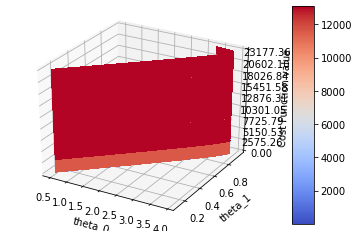

In [31]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
x_axis = store_theta_0
y_axis = store_theta_1
z_axis = store_j_theta

# Plot the surface.
surf = ax.plot_surface(x_axis, y_axis, z_axis, cmap=cm.coolwarm,rstride=1, cstride=10,
                       linewidth=0, antialiased=False)

ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.set_zlabel('Cost Function value')

ax.set_zlim(min(z_axis), max(z_axis))
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=1, aspect=10)

plt.show()

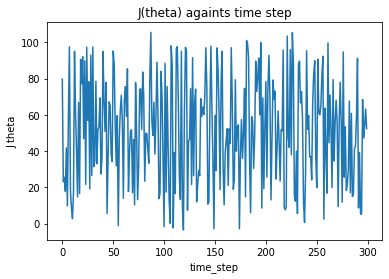

In [32]:
y_line = store_j_theta
time_step = np.arange(len(y_line))

plt.plot(time_step, y)
plt.xlabel('time_step')
plt.ylabel('J theta')
plt.title("J(theta) againts time step")

plt.show()

Well. Seem like the cost function did not convergence, it is required to be improved. To improve the 